# Jupyter widgets for interactive plots

More info in: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html

In [1]:
import ipywidgets as widgets

In [2]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [3]:
w.value

0

In [4]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

## File upload

In [5]:
widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value={}, description='Upload')

In [6]:
uploader = widgets.FileUpload()
display(uploader)

# upload something...

# once a file is uploaded, use the `.value` attribute to retrieve the content:
uploader.value
#=> (
#=>   {
#=>     'name': 'example.txt',
#=>     'type': 'text/plain',
#=>     'size': 36,
#=>     'last_modified': datetime.datetime(2020, 1, 9, 15, 58, 43, 321000, tzinfo=datetime.timezone.utc),
#=>     'content': <memory at 0x10c1b37c8>
#=>   },
#=> )

FileUpload(value={}, description='Upload')

{}

In [66]:
#uploader.value
uploaded_file = uploader.value
#uploaded_file['test1.csv']['metadata']
uploaded_file['test_hotspot.csv']['metadata']

{'name': 'test_hotspot.csv',
 'type': 'text/csv',
 'size': 747290,
 'lastModified': 1619000008784}

In [71]:
import io
import pandas as pd
#uploaded_file['test1.csv']['content']
#df = pd.read_csv(io.BytesIO(uploaded_file['test1.csv']['content']),delimiter=';')
df = pd.read_csv(io.BytesIO(uploaded_file['test_hotspot.csv']['content']),delimiter=';')
df

,time,source,destination,size,class
0,0,15,36,5,0
1,0,34,36,5,0
2,0,62,36,5,0
3,1,13,36,5,0
4,1,20,36,5,0
...,...,...,...,...,...
50809,7999,55,36,5,0
50810,7999,56,36,5,0
50811,7999,57,36,5,0
50812,7999,61,36,5,0


In [72]:
bins = 100
max_cycle = df.time.max() + 1

time_slice = max_cycle / bins
time_slice

80.0

The next results indicate that approximately each {{time_slice}} 

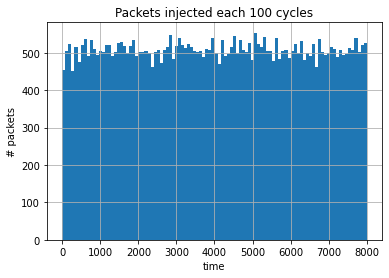

In [73]:
import matplotlib.pyplot as plt
ax = df.hist(column='time', bins=bins)[0][0] 
ax.set_title('Packets injected each {} cycles'.format(bins))
ax.set_ylabel('# packets')
ax.set_xlabel('time')
plt.show()

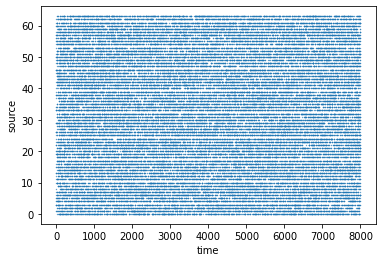

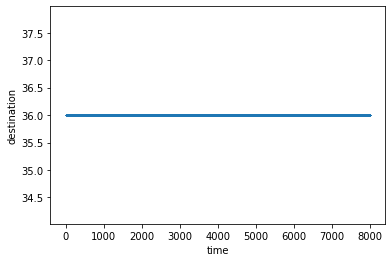

In [75]:
ax1 = df.plot.scatter(x='time',y='source', s=0.1)
ax2 = df.plot.scatter(x='time',y='destination', s=0.1)
plt.show()